#### Import required Python Libraries

In [23]:
#Scikit-learn library in python has a lot of inbuilt packages for different machine learning algorithms. 

from sklearn.datasets import load_boston                    #boston_house_prices.csv available already in python
from sklearn.metrics import mean_squared_error, r2_score    #metrics used for measuring accuracy
from sklearn.linear_model import LinearRegression           #LinearRegression Algorithm
from sklearn.model_selection import train_test_split        #Entire dataset will be split into train & test
                                                            #using train dataset - model will be built
                                                            #using test dataset - model's performance is measured

import pandas as pd   #pandas library deals with Dataframe
import numpy as np    #numpy library deals with arrays

#The main difference between 'pandas' and 'numpy' is 
#pandas can store multiple data types(both qualitative and quantitative) in tabular format called dataframe
#whereas numpy can only handle numerical data

import matplotlib.pyplot as plt
import seaborn as sns

#### Load boston dataset

In [2]:
boston_dataset = load_boston()

In [3]:
#boston_dataset comes in the form of dictionary (i.e) {key1:value1, key2:value2 ..., keyn:valuen}

#Display the list of keys
print(boston_dataset.keys())     #print the keys available in the dataset      

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


'data'              => Input predictors   

'target'            => acutal output    

'feature_names'     => Names of each input predictor and the target

'DESCR'             => Complete description of the dataset including column definition  

'filename'          => path of the boston file      

In [4]:
#Exploring each keys starting with description of the each column
#If the data is in the form of dictionary, then in order to see the values, the key information is given as input

print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(boston_dataset['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


The input data is in the form of array.

In [6]:
#get the total count of training samples and number of input predictors
print(boston_dataset['data'].shape)

(506, 13)


In the shape command,    
First value indicates number of rows (i.e) count of training data   
Second value denotes number of input predictors                           

In [7]:
#knowing the details of target variable
print(boston_dataset['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [8]:
#print the shape of the target
print(boston_dataset['target'].shape)

(506,)


Total we have 506 target values corresponding to the input training samples. The column is '1' eventhough it is not displayed.
For 1-D arrays, the shape basically will give the count.

In [9]:
#display the feature names
print(boston_dataset['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
print(boston_dataset['feature_names'].shape)

(13,)


Totally we have 13 input features and the corresponding name.

In [11]:
print(boston_dataset['filename'])

C:\Users\91965\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [12]:
#let's create a dataframe of input predictors by merging the feature names and feature values
#using pandas create a dataframe

input_df = pd.DataFrame(boston_dataset['data'], columns = boston_dataset['feature_names'])
target_df = pd.DataFrame(boston_dataset['target'], columns=['MEDV'])

In [13]:
input_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
target_df

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [15]:
#if we want all input and output in a single Dataframe we can merge and this will be helpful for visualization
#using join command we can create a one Dataframe(data + target)

final_data = input_df.join(target_df)

In [16]:
final_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
#we will do some basic data exploration
final_data.head()                #display first 5 records

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
final_data.shape

(506, 14)

Since we merged the target to the input, we have 14 columns

In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


The information command shows total count of non-nullable values in each column and also the datatypes of each field.

In [20]:
#command to display datatypes of each field
final_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

As we can see, all the fields are float64(Numeric/Quantitative)

In [21]:
#check if there is any duplicate records in the file, if so we can retain only one distinct record
#duplicate records will have same information and the model will not learn anything new

final_data.duplicated().sum()

0

There are no duplicates.

In [22]:
final_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Describe command gives details statistical information such as mean, standard deviation, minimum value, maximum value, 25th percentile, 50th percentile and 75th percentile. 

### Data Visualization

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

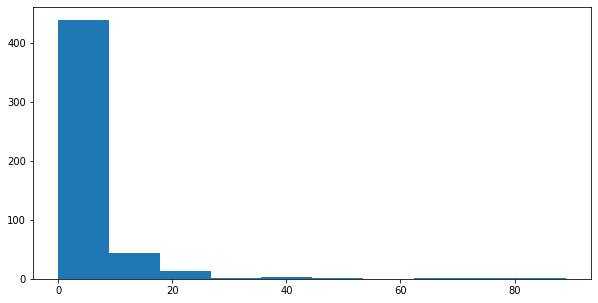

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(final_data['CRIM'])

<Figure size 720x360 with 0 Axes>

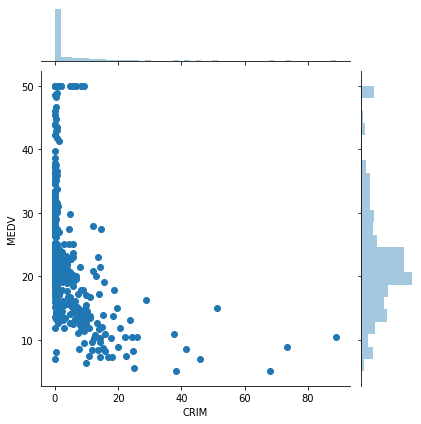

In [35]:
plt.figure(figsize=(10,5))
sns.jointplot(final_data['CRIM'], final_data['MEDV'])

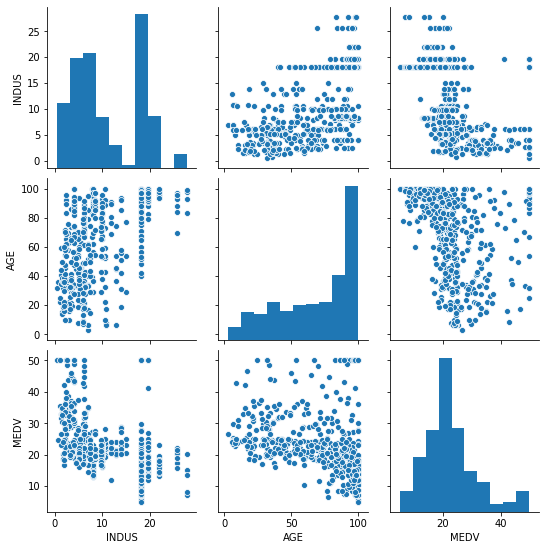

In [42]:
#display pair plot for all the variables
sns.pairplot(final_data[['INDUS','AGE','MEDV']])

### Boxplot Visualisation

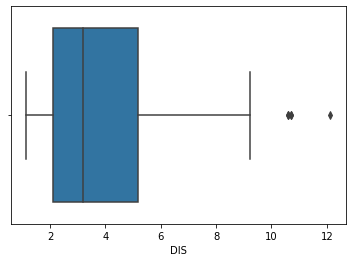

In [47]:
sns.boxplot(final_data['DIS'])

### Heatmap for correlation

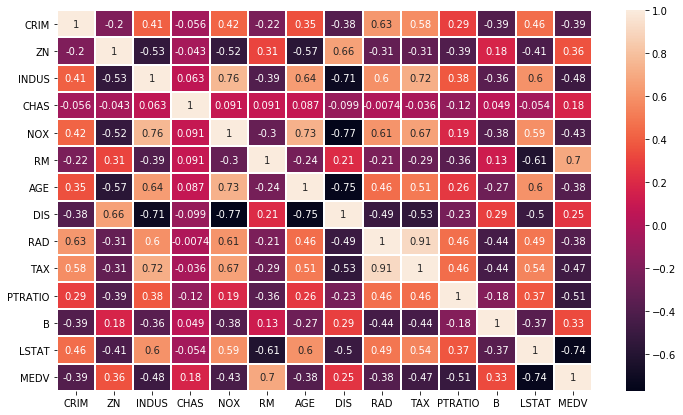

In [55]:
correlation = final_data.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot = True, linewidth = 1)

In [595]:
#X => input
#y => target output

X = final_data.drop('MEDV', axis=1)        #dropping only 'MEDV' and retaining the rest
y = final_data['MEDV']                     #choosing only 'MEDV'

#### Split the dataset into train and test

In [596]:
#Splitting the dataset into train(0.85%) and test(0.15%). 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state = 100)

#random state helps to maintain the same split every time this code is run.
#If random state is not given, then the data split will not be consistent, it keeps changing and thus making
#it difficult to measure the accuracy.

In [597]:
train_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
43,0.15936,0.0,6.91,0.0,0.4480,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
399,9.91655,0.0,18.10,0.0,0.6930,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97
90,0.04684,0.0,3.41,0.0,0.4890,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0.0,0.4840,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
359,4.26131,0.0,18.10,0.0,0.7700,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67
323,0.28392,0.0,7.38,0.0,0.4930,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76


In [598]:
test_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.40771,0.0,6.20,1.0,0.507,6.164,91.3,3.0480,8.0,307.0,17.4,395.24,21.46
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84


In [599]:
train_y

43     24.7
97     38.7
399     6.3
90     22.6
98     43.8
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: MEDV, Length: 430, dtype: float64

In [600]:
test_y

198    34.6
229    31.5
502    20.6
31     14.5
315    16.2
       ... 
221    21.7
384     8.8
22     15.2
41     26.6
437     8.7
Name: MEDV, Length: 76, dtype: float64

#### Build the model using train data and predict the output for test data.

In [601]:
#using the inbuilt algorithm, we can build the model now

#initialize the model
linearregression = LinearRegression()

#fit or train the model
linearregression.fit(train_x, train_y)     #we can notice during training both input and actual output are given. so that the 
                                       #model learns and corrects itself by comparing the actual output and predicted output
    
#predict test 
predicted_output = linearregression.predict(test_x)        #During prediction only input is given

In [602]:
predicted_output

array([34.61592076, 31.36261701, 22.48149203, 18.07548936, 20.76563869,
       26.85345952, 26.58085056, 23.64017968, 22.6656563 , 19.62517573,
       27.05479704, 17.35803382, 20.67346574, 15.25066949, 41.74533147,
       20.28885644, 29.20960088, 19.06421087, 32.56331709, 41.56588361,
       34.86314822, 16.51333684, 20.52065196, 18.14798898, 13.09610648,
       12.32831751, 27.35453714, 20.33613729, 18.92943713, 20.10660826,
       15.74680271, 24.67504274, 39.29213503, 24.87610063, 31.21732313,
       28.49320354, 16.69506828, 14.77377145, 16.80612663, 23.30303248,
       23.12245343, 23.42964416, 14.06742719, 21.45652091, 33.10550702,
       27.33614155, 19.62227966, 14.9197051 , 17.2390126 , 12.65783424,
       21.71008596, 20.38578857, 24.0267342 , 23.77688033, 11.8899357 ,
       14.13738579, 24.51467614, 34.09983631,  9.85985309, 21.2275868 ,
       17.97702713, 19.72143921, 17.43466643, 30.1880328 , 20.54856954,
       25.18395437, 15.79956085, 24.9351056 , 22.39660651, 20.89

In [603]:
predicted_output.shape

(76,)

#### Evaluate the Model for test data

In [604]:
#compare the actual_output and predicted output using the metrics mean_squared_error and r2_score

print('Mean Squared Error:', mean_squared_error(test_y, predicted_output))
print('Rsquared_score:', r2_score(test_y, predicted_output))

Mean Squared Error: 12.42222958888445
Rsquared_score: 0.8273125828534864
